Basic Operations on Images

Learn to:

. Access pixel values and modify them

. Access image properties

. Set a Region of Interest (ROI)

. Split and merge images

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('2.jpg')
px = img[100,100]
print( px )

[220 215 216]


In [2]:
# accessing only blue pixel

blue = img[100,100,0]
print( blue )

220


You can modify the pixel values the same way.

In [3]:
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


#### Accessing Image Properties

Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.

In [4]:
print( img.shape )

(6000, 4000, 3)


In [5]:
#Total number of pixels is accessed by
print( img.size )

72000000


#### Image ROI

Sometimes, you will have to play with certain regions of images. For eye detection in images, first face detection is done over the entire image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).

ROI is again obtained using Numpy indexing.

In [11]:
img.imshow()

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

In [9]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
print(ball)

[[[203 198 195]
  [216 211 208]
  [221 216 213]
  ...
  [207 202 199]
  [211 206 203]
  [208 203 200]]

 [[201 196 193]
  [204 199 196]
  [208 203 200]
  ...
  [211 206 203]
  [211 206 203]
  [210 205 202]]

 [[202 197 194]
  [197 192 189]
  [200 195 192]
  ...
  [211 206 203]
  [207 202 199]
  [208 203 200]]

 ...

 [[215 208 205]
  [212 205 202]
  [209 202 199]
  ...
  [208 201 198]
  [203 196 193]
  [207 200 197]]

 [[218 211 208]
  [215 208 205]
  [210 203 200]
  ...
  [209 202 199]
  [204 197 194]
  [206 199 196]]

 [[209 202 199]
  [207 200 197]
  [204 197 194]
  ...
  [217 210 207]
  [212 205 202]
  [211 204 201]]]


##### Splitting and Merging Image Channels
Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels. 


In [12]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

In [13]:
#cv.split() is a costly operation (in terms of time). So use it only if necessary. Otherwise go for Numpy indexing.

#Suppose you want to set all the red pixels to zero - you do not need to split the channels first. Numpy indexing is faster:
img[:,:,2] = 0

#### Making Borders for Images (Padding)

src - input image

top, bottom, left, right - border width in number of pixels in corresponding directions

borderType - Flag defining what kind of border to be added. It can be following types:
    
    a) cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
    
    b) cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    
    c) cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    
    d) cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    
    e) cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg

value - Color of border if border type is cv.BORDER_CONSTANT

In [16]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.2.0-cp38-cp38-win_amd64.whl (3.3 MB)


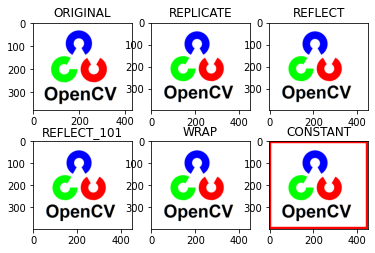

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]
img1 = cv.imread('opencv.png')
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

#### Image Addition 

You can add two images with the OpenCV function, cv.add(), or simply by the numpy operation res = img1 + img2. Both images should be of same depth and type, or the second image can just be a scalar value.

#### Image Blending
This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency.

The first image is given a weight of 0.7 and the second image is given 0.3. 

In [20]:
img1 = cv.imread('blending.jpg')
img2 = cv.imread('blending2.jpg')
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

#### Bitwise Operations

This includes the bitwise AND, OR, NOT, and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI's, and etc

In [23]:
# Load two images
img1 = cv.imread('1.jpg')
img2 = cv.imread('blending2.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()